# Lab 9: Feature Engineering & Cross-Validation
In this lab, you will practice using scikit-learn to do feature engineering and cross-validation to produce a model with low error on held-out data.

In [5]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown

### Introduction

For this lab, we will use a toy dataset to predict the house prices in Boston with data provided by the `sklearn.datasets` package. There are more interesting datasets in the package if you want to explore them during your free time!

Run the following cell to load the data. `load_boston()` will return a dictionary object which includes keys for:
    - `data` : the covariates (X)
    - `target` : the response vector (Y)
    - `feature_names`: the column names
    - `DESCR` : a full description of the data


In [6]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

A look at the `DESCR` attribute tells us the data contains these features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of black 
                 residents by town
    13. LSTAT    % lower status of the population
    
Let's now convert this data into a pandas DataFrame. 

In [8]:
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Question 1

Let's model this housing price data! Before we can do this, however, we need to split the data into training and test sets. The latter, held-out points will be used to choose the best performing model. Remember that the response vector (housing prices) lives in the `target` attribute. A random seed is set here so that we can generate the same splitting in the future if we want to test our result again and find potential bugs.

Use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out 10% of the data for test. Call the resulting splits `X_train`, `X_test`, `Y_train`, `Y_test`.


In [9]:
from sklearn.model_selection import train_test_split
np.random.seed(47)

X = boston
Y = pd.Series(boston_data['target'])

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1
)

### Question 2

As a warmup, fit a linear model to describe the relationship between the housing price and all available covariates. We've imported `sklearn.linear_model` as `lm`, so you can use that instead of typing out the whole module name. Fill in the cells below to fit a linear regression model to the covariates and create a scatter plot for our predictions vs. the true prices.


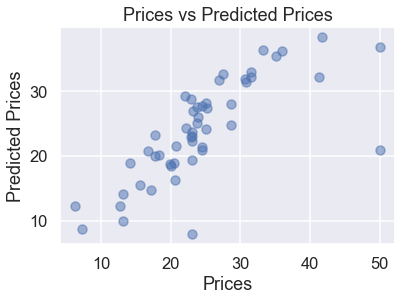

In [11]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train,Y_train)

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true prices
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices");

Briefly analyze the scatter plot above. Do you notice any outliers? Write your answer in the cell below.

From the scatter plot above, we can see that the coefficient of the trend roughly equals to 1, which means our prediction is good. But there are some outliers where the predicted values are lower than the real values.

### Question 3

As we find from the scatter plot, our model is not perfect. If it were perfect, we would see the identity line (i.e. a line of slope 1). Compute the root mean squared error (RMSE) of the predicted responses: 

$$
\textbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 }
$$

Fill out the function below and compute the RMSE for our predictions on both the training data `X_train` and the test set `X_test`.  Note your implementation should not contain the word **"for"** (...that would be very slow).

In [13]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y-predicted_y)**2))

train_error = rmse(Y_train,linear_model.predict(X_train))
test_error = rmse(Y_test,Y_pred)

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 4.562305960933929
Test RMSE: 5.887073477757793


Is your training error lower than the test error? If so, why could this be happening? Answer in the cell below.

Yes, the training error is lower than test error. Because the model overfits the training data, when comes to the test data, the model cannot perform that well.

## Cross Validation

Let's try building a simpler linear model with fewer features. While this may increase our training error, it may also decrease our test error and help prevent overfitting to the training set.

In the next section, we'll use $k$-fold cross-validation to select the best subset of features for our model. Recall the approach looks something like:

<img src="cv.png" width=500px>

**Warning**: Don't use the test set to perform the feature selection! We want to avoid using the test set too frequently, as we want to preserve some data to see how well our model truly performs. When selecting features or choosing hyper-parameters, we can split the training set further into train and validation sets. Then we can use the average validation error to help select hyper-parameters.

### Question 4

Scikit-learn has built-in support for cross validation.  However, to better understand how cross validation works complete the following function which cross validates a given model.

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get 4 splits on the training data. Note that `split` returns the indices of the data for that split.
2. For each split, select out the rows and columns based on the split indices and features.
3. Compute the RMSE on the validation split.
4. Return the average error across all cross validation splits.


In [15]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train,split_Y_train)

        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid,model.predict(split_X_valid))


        validation_errors.append(error)
        
    return np.mean(validation_errors)

### Question 5

We have defined four different feature sets, each containing three features (stored in `feature_sets` below). Use `compute_CV_error` to determine which feature set gets us the lowest average validation error. Then, fill in the variables `best_err_idx`, `best_err`, and `best_feature_set` below.

**Hint:** To find the index of the lowest error in `errors`, you may want to use [`np.argmin`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html).

<!--
BEGIN QUESTION
name: q5
-->

In [16]:
feature_sets = [
    ['TAX', 'INDUS', 'CRIM'], 
    ['RM', 'LSTAT', 'PTRATIO'], 
    ['RM', 'B', 'NOX'], 
    ['TAX', 'LSTAT', 'DIS']
]

errors = []
for feat in feature_sets:
    print("Trying features:", feat)
    model = lm.LinearRegression()
    # compute the cross validation error
    error = compute_CV_error(model,X_train[feat],Y_train)
    
    print("\tRMSE:", error)
    errors.append(error)

best_err_idx = np.argmin(errors)
best_err = errors[best_err_idx]
best_feature_set = feature_sets[best_err_idx]

for i in range(4):
    print('{}, error: {}'.format(feature_sets[i], errors[i]))

best_feature_set, best_err

Trying features: ['TAX', 'INDUS', 'CRIM']
	RMSE: 7.593764533936077
Trying features: ['RM', 'LSTAT', 'PTRATIO']
	RMSE: 5.221575997721902
Trying features: ['RM', 'B', 'NOX']
	RMSE: 5.803276796238313
Trying features: ['TAX', 'LSTAT', 'DIS']
	RMSE: 6.150288547992476
['TAX', 'INDUS', 'CRIM'], error: 7.593764533936077
['RM', 'LSTAT', 'PTRATIO'], error: 5.221575997721902
['RM', 'B', 'NOX'], error: 5.803276796238313
['TAX', 'LSTAT', 'DIS'], error: 6.150288547992476


(['RM', 'LSTAT', 'PTRATIO'], 5.221575997721902)

### Question 6

Finally, fit a linear model using your best feature set and predict housing prices for your original test set. You can also try to select your own features (on top of the given ones) to lower the RMSE. Compute the final train and test RMSEs for a linear model using your best feature set.


In [18]:
# Fit your linear model
model = lm.LinearRegression()
model.fit(X_train[['RM', 'LSTAT', 'PTRATIO']],Y_train)

# Predict points from our test set and calculate the mse
train_rmse = rmse(Y_train, model.predict(X_train[['RM', 'LSTAT', 'PTRATIO']])) 
test_rmse = rmse(Y_test,model.predict(X_test[['RM', 'LSTAT', 'PTRATIO']]))

print("Train RMSE", train_rmse)
print("KFold Validation RMSE", best_err)
print("Test RMSE", test_rmse)

Train RMSE 5.14532389890959
KFold Validation RMSE 5.221575997721902
Test RMSE 5.846401452163673


Here we've plotted a residual plot for each record from `X_test`. After seeing your testing and training error, it is often helpful to visiualize your error. When points in the residual plot are randomly scattered around the line y = 0, then we know that a linear regression model is good for the data we have.

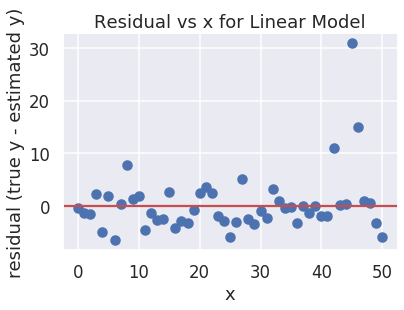

In [69]:
plt.scatter(np.arange(len(X_test)), Y_test - model.predict(X_test[best_feature_set]))
plt.xlabel('x')
plt.ylabel('residual (true y - estimated y)')
plt.title('Residual vs x for Linear Model')
plt.axhline(y = 0, color='r');

Nice! You've used $k$-fold cross-validation to fit a linear regression model to the housing data.

In the future, you'd probably want to use something like [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to automatically perform cross-validation, but it's instructive to do it yourself at least once.